In [0]:
!git clone https://github.com/shahidee44/Numerai-Dataset

Cloning into 'Numerai-Dataset'...
remote: Enumerating objects: 223, done.
remote: Counting objects: 100% (223/223), done.
remote: Compressing objects: 100% (217/217), done.
remote: Total 223 (delta 13), reused 206 (delta 3), pack-reused 0
Receiving objects: 100% (223/223), 146.04 MiB | 22.31 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Checking out files: 100% (189/189), done.


In [0]:
#Import Dependencies
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import keras as keras
import time
from mpl_toolkits.mplot3d import Axes3D
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, ReLU, ELU
from numpy.random import seed
from tensorflow import set_random_seed
from keras import backend as K
from sklearn.decomposition import PCA
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.
W0707 06:30:01.127836 140590249916288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0707 06:30:01.129241 140590249916288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0707 06:30:01.130235 140590249916288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0707 06:30:02.336651 140590249916288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



['/job:localhost/replica:0/task:0/device:GPU:0']

Starting PCA...
Time Taken for PCA: 5.05
NN Number: 1. Training Accuracy: 0.5248. Validation Accuracy: 0.5169. Time Taken: 36.53.
NN Number: 2. Training Accuracy: 0.5235. Validation Accuracy: 0.5137. Time Taken: 36.76.
NN Number: 3. Training Accuracy: 0.5235. Validation Accuracy: 0.5156. Time Taken: 37.5.
NN Number: 4. Training Accuracy: 0.5239. Validation Accuracy: 0.5142. Time Taken: 38.6.
NN Number: 5. Training Accuracy: 0.5238. Validation Accuracy: 0.5147. Time Taken: 38.71.
NN Number: 6. Training Accuracy: 0.5239. Validation Accuracy: 0.5155. Time Taken: 38.7.
NN Number: 7. Training Accuracy: 0.5231. Validation Accuracy: 0.5168. Time Taken: 39.32.
NN Number: 8. Training Accuracy: 0.5223. Validation Accuracy: 0.5156. Time Taken: 39.66.
NN Number: 9. Training Accuracy: 0.523. Validation Accuracy: 0.5163. Time Taken: 39.89.
NN Number: 10. Training Accuracy: 0.5229. Validation Accuracy: 0.5146. Time Taken: 39.57.


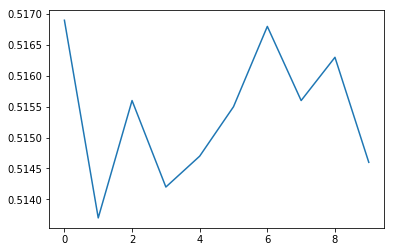

Mean Accuracy: 0.51539. Layer Width: 64.
Done outputing to prediction_hillary.csv


In [0]:
#Removes metadata and filters by regex. Output: Features, Targets and Feature&Target Dataframe.
def clean_data(input_dataframe, drop_columns):
  
  feature_target_dataframe = input_dataframe.drop(columns = drop_columns)
  feature_dataframe = feature_target_dataframe.filter(regex = 'feature', axis = 1)
  target_dataframe = feature_target_dataframe.filter(regex = 'target', axis = 1)
  
  return feature_dataframe, target_dataframe, feature_target_dataframe

#Load data by mode.
def load_data(mode, file_path):
  #Import Data
  train_data = pd.read_csv(file_path)

  #Clean Data. Seperate into features and targets
  features_X, targets_X, _ = clean_data(train_data, ['id', 'era', 'data_type'])
    
  target_bernie_X = targets_X['target_bernie']
  target_ken_X = targets_X['target_ken']
  target_charles_X = targets_X['target_charles']
  target_frank_X = targets_X['target_frank']
  target_hillary_X = targets_X['target_hillary']
  
  if mode == 'bernie':
    return features_X, target_bernie_X
  elif mode == 'ken':
    return features_X, target_ken_X
  elif mode == 'charles':
    return features_X, target_charles_X
  elif mode == 'frank':
    return features_X, target_frank_X
  elif mode == 'hillary':
    return features_X, target_hillary_X
  
def select_and_combine_train(mode, from_era, to_era):
  
  test_load_feature, _ = load_data(mode, 'Numerai-Dataset/training_data/era1.csv')
  feature_df = pd.DataFrame(columns = test_load_feature.columns)
  target_df = pd.DataFrame(columns = ['target_' + mode])
  
  if (from_era == to_era):
    feature, target = load_data(mode, 'Numerai-Dataset/training_data/era' + str(from_era) + '.csv')
    feature_df = feature_df.append(feature, ignore_index = True)
    target_df = target_df.append(pd.DataFrame(target, columns = ['target_' + mode]), ignore_index = True)
    
  else:
    for i in range(from_era, to_era + 1):
      feature, target = load_data(mode, 'Numerai-Dataset/training_data/era' + str(i) + '.csv')
      feature_df = feature_df.append(feature, ignore_index = True)
      target_df = target_df.append(pd.DataFrame(target, columns = ['target_' + mode]), ignore_index = True)

  return feature_df, target_df

def select_and_combine_tournament(mode, from_era, to_era):
  
  test_load_feature, _ = load_data(mode, 'Numerai-Dataset/tournament_data/era121.csv')
  feature_df = pd.DataFrame(columns = test_load_feature.columns)
  target_df = pd.DataFrame(columns = ['target_' + mode])
  
  if (from_era == to_era):
    feature, target = load_data(mode, 'Numerai-Dataset/tournament_data/era' + str(from_era) + '.csv')
    feature_df = feature_df.append(feature, ignore_index = True)
    target_df = target_df.append(pd.DataFrame(target, columns = ['target_' + mode]), ignore_index = True)
    
  else:
    for i in range(from_era, to_era + 1):
      feature, target = load_data(mode, 'Numerai-Dataset/tournament_data/era' + str(i) + '.csv')
      feature_df = feature_df.append(feature, ignore_index = True)
      target_df = target_df.append(pd.DataFrame(target, columns = ['target_' + mode]), ignore_index = True)

  return feature_df, target_df

def select_and_combine(mode, from_era, to_era):
  
  if (to_era < 121):
    feature_df, target_df = select_and_combine_train(mode, from_era, to_era)
  else:
    if (from_era < 121):
      df_f_1, df_t_1 = select_and_combine_train(mode, from_era, to_era)
      df_f_2, df_t_2 = select_and_combine_tournament(mode, from_era, to_era)
      feature_df = df_f_1.append(df_f_2)
      target_df = df_t_1.append(df_t_2)
    else:
      feature_df, target_df = select_and_combine_tournament(mode, from_era, to_era)
      
  return feature_df, target_df

def apply_pca(n_components, train_feature, test_feature):
  
  print("Starting PCA...")
  start = time.time()
  pca = PCA(n_components = n_components)
  pca = pca.fit(train_feature)
  pca_train_feature = pd.DataFrame(pca.transform(train_feature))
  pca_test_feature = pd.DataFrame(pca.transform(test_feature))
  end = time.time()
  print("Time Taken for PCA: {}".format(round(end - start, 2)))
  
  return pca_train_feature, pca_test_feature, pca
  

#Takes the top few using the ranked_cutoff and its accuracy metric
def ActivationLayer(activation_layer_name, model):
  
  if activation_layer_name == 'relu':
    model.add(ReLU(max_value = None, negative_slope = 0.0, threshold = 0.0))
  elif activation_layer_name == 'leaky':
    model.add(LeakyReLU(alpha = 0.3))
  elif activation_layer_name == 'elu':
    model.add(ELU(alpha = 1.0))

def build_model(layer_width = 32, activation_layer = 'relu', input_dim = 50):
  
  model = Sequential()
  model.add(Dense(layer_width, input_dim = input_dim))
  ActivationLayer(activation_layer, model)
  model.add(Dropout(0.2))
  model.add(Dense(int(layer_width)))
  ActivationLayer(activation_layer, model)
  model.add(Dropout(0.2))
  model.add(Dense(int(layer_width)))
  ActivationLayer(activation_layer, model)
  model.add(Dropout(0.2))
  model.add(Dense(int(layer_width)))
  ActivationLayer(activation_layer, model)
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  
  return model

def evaluate_model(train_feature, train_target, test_feature,
                      test_target, model, epochs, batch_size):
  
  model.fit(train_feature, train_target, epochs = epochs, batch_size = batch_size, validation_split = 0.3,verbose = 0)

  training_score = model.evaluate(train_feature, train_target, batch_size = batch_size, verbose = 0)
  validation_score = model.evaluate(test_feature, test_target, batch_size = batch_size, verbose = 0)
    
  return training_score[1], validation_score[1], model

def return_best_model(model_dataframe):
  
  new_output = model_dataframe.sort_values(by = "accuracy", ascending = False).reset_index(drop = True)
  best_model = new_output['model data'][0]
  
  return best_model

def predict_on_eras_training(mode, from_era, to_era, model, batch_size):
  
  score_card = []
  for i in range(from_era, to_era + 1):
    test_feature, test_target = load_data(mode, 'Numerai-Dataset/training_data/era'+ str(i) +'.csv')
    score = model.evaluate(test_feature, test_target, batch_size = batch_size, verbose = 0)
#     print("Era {}: {}.".format(i, score[1]))
    score_card.append([i, score[1]])
  
  return score_card

def predict_on_eras_tournament(mode, from_era, to_era, model, batch_size):
  
  score_card = []
  for i in range(from_era, to_era + 1):
    test_feature, test_target = load_data(mode, 'Numerai-Dataset/tournament_data/era'+ str(i) +'.csv')
    score = model.evaluate(test_feature, test_target, batch_size = batch_size, verbose = 0)
#     print("Era {}: {}.".format(i, score[1]))
    score_card.append([i, score[1]])
  
  return score_card

def predict_on_eras(mode, from_era, to_era, model, batch_size):
  
  if (to_era < 121):
    score_list = predict_on_eras_training(mode, from_era, to_era, model, batch_size)
  else:
    if (from_era < 121):
      list_1 = predict_on_eras_training(mode, from_era, 120, model, batch_size)
      list_2 = predict_on_eras_tournament(mode, 121, to_era, model, batch_size)
      score_list = list_1 + list_2
    else:
      score_list = predict_on_eras_tournament(mode, from_era, to_era, model, batch_size)
      
  return score_list

def get_prediction_data(mode):
  
  eraX = pd.read_csv('Numerai-Dataset/tournament_data/eraX.csv')
  eraX_feature, _, _ = clean_data(eraX, ['id', 'era', 'data_type'])
  
  id_df = pd.DataFrame(columns = ['id'])
  feature_df = pd.DataFrame(columns = eraX_feature.columns)
  for i in range(121, 187):
    era_id = pd.read_csv('Numerai-Dataset/tournament_data/era' + str(i) + '.csv')['id']
    id_df = id_df.append(pd.DataFrame(era_id, columns = ['id']), ignore_index = True)
    era_feature, _ = load_data(mode, 'Numerai-Dataset/tournament_data/era' + str(i) + '.csv')
    feature_df = feature_df.append(era_feature, ignore_index = True)
    
  id_df = id_df.append(pd.DataFrame(eraX['id'], columns = ['id']), ignore_index = True)
  feature_df = feature_df.append(eraX_feature, ignore_index = True)
    
  return id_df, feature_df

#To fit, predict and output to csv.
def run_predictions(mode, model, batch_size, pca_model = ''):
  
  test_id, test_feature = get_prediction_data(mode)
  
  if pca_model != '':
    test_feature = pd.DataFrame(pca_model.transform(test_feature))
    
  prediction = model.predict(test_feature, batch_size = batch_size)
  output_file_name = 'prediction_' + mode +  '.csv'

  for i in prediction.transpose():
    prediction_series = pd.Series(i)

  output_df = pd.concat([test_id, prediction_series], axis = 1)
  output_df.columns = ['id', 'probability_' + mode]
  output_df.to_csv(output_file_name, index = False)
  print("Done outputing to {}".format(output_file_name))

#Trains model based on the number of "trials". Outputs the Accuracy and model configuration. 
def main():
  
  #model training
  trials = 10
  epochs = 20
  batch_size = 1024
  target_type = 'hillary'
  result_card = []
  era_start_train = 1
  era_end_train = 120
  layer_width_array = 64
  
  #model validation (Selects model based on using this set as validation accuracy)
  era_start_test = 121
  era_end_test = 132
    
#   If era_start_train == era_end_train, only that era will be in the output of the function.
  train_feature, train_target = select_and_combine(target_type, era_start_train, era_end_train)
  test_feature, test_target = select_and_combine(target_type, era_start_test, era_end_test)
  
  train_feature, test_feature, pca = apply_pca(21, train_feature, test_feature)
  
  for i in range(trials):
    start = time.time()
    model = build_model(layer_width = layer_width_array, activation_layer = 'relu', input_dim = len(train_feature.columns))
    training_acc, result, model = evaluate_model(train_feature, train_target, test_feature, test_target, model, epochs, batch_size)
    end = time.time()
    print("NN Number: {}. Training Accuracy: {}. Validation Accuracy: {}. Time Taken: {}.".format(i+1, round(training_acc, 4), round(result, 4), round(end - start, 2)))
    result_card.append([round(result, 4), model])

  df = pd.DataFrame(result_card,columns = ['accuracy', 'model data'])

  plt.plot(df['accuracy'])
  plt.show()

  print("Mean Accuracy: {}. Layer Width: {}.".format(df['accuracy'].mean(), layer_width_array))
  
  best_model = return_best_model(df)
  
  run_predictions(target_type, best_model, batch_size, pca)
  
  K.clear_session()
  
#Runs main stores output of main() as output.
if __name__ == '__main__':
   main()

Era 1 - 120 (Training Set)

Era 121 - 132 (Valdiation Set)

Era 133 - 186 (Test Set) - No Ground Truth

Era X (Live Set)
